In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics
from sklearn import datasets

digits = datasets.load_digits()
faces = datasets.fetch_olivetti_faces()

In [2]:
faces.data.shape

(400, 4096)

In [3]:
digits.data.shape

(1797, 64)

# Dataset exploration:

In [4]:
print(faces.keys(), '\n')

dict_keys(['data', 'images', 'target', 'DESCR']) 



In [5]:
print('digits target names are:', '\n', digits.target_names)
print('faces target names are:',  '\n', faces.target)

digits target names are: 
 [0 1 2 3 4 5 6 7 8 9]
faces target names are: 
 [ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 

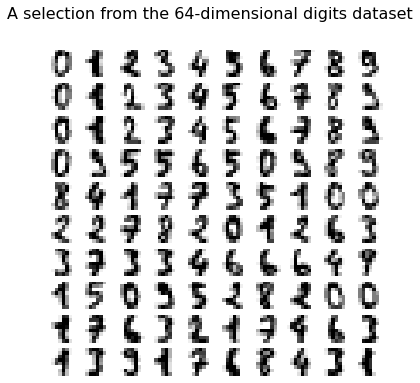

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(digits.images[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

# Train and Test

In [7]:
X, y = digits.data, digits.target
# X, y = faces.data, faces.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

## Support Vector Machine:

In [8]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
print("Train Error:", 1-clf.score(X_train, y_train))
print("Test Error:", 1-clf.score(X_test, y_test))

Train Error: 0.0027835768963118124
Test Error: 0.005555555555555536


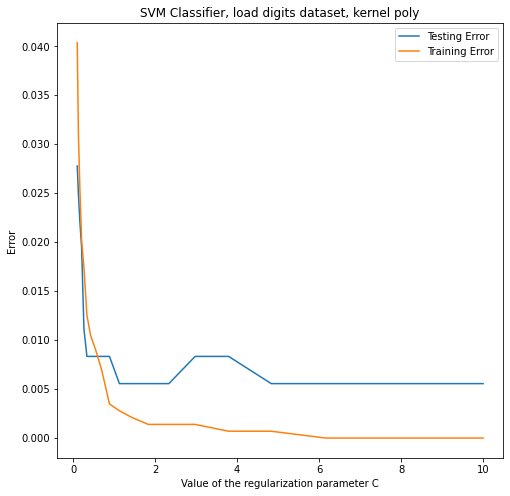

In [9]:
C = np.logspace(-1, 1, 20)
train_error = []
test_error = []


for i,k in enumerate(C):
    SVM_clf = svm.SVC(C=k, kernel='rbf') #{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
    SVM_clf.fit(X_train, y_train)
    train_error.append(1 - SVM_clf.score(X_train, y_train)) 
    test_error.append(1 - SVM_clf.score(X_test, y_test))


f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)      
plt.plot(C, test_error, label = 'Testing Error')
plt.plot(C, train_error, label = 'Training Error')
# plt.plot(np.arange(1,len(test_error)+1), test_error, label = 'Testing Error')
# plt.plot(np.arange(1,len(train_error)+1), train_error, label = 'Training Error')
plt.legend()
# plt.title('SVM Classifier Olivetti faces dataset, kernel linear')
plt.title('SVM Classifier, load digits dataset, kernel poly')
plt.xlabel('Value of the regularization parameter C')
plt.ylabel('Error')
plt.show()

### Random Forest classifier:

In [60]:
# X, y = digits.data, digits.target
X, y = faces.data, faces.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [61]:
import time
start_time = time.time()

from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=100, max_depth=None, max_features="auto", criterion='gini', random_state=None)
RF_clf.fit(X_train,y_train)

elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

print("Train Error:", 1-RF_clf.score(X_train, y_train))
print("Test Error:", 1-RF_clf.score(X_test, y_test))

Elapsed time to compute the importances: 1.617 seconds
Train Error: 0.0
Test Error: 0.0625


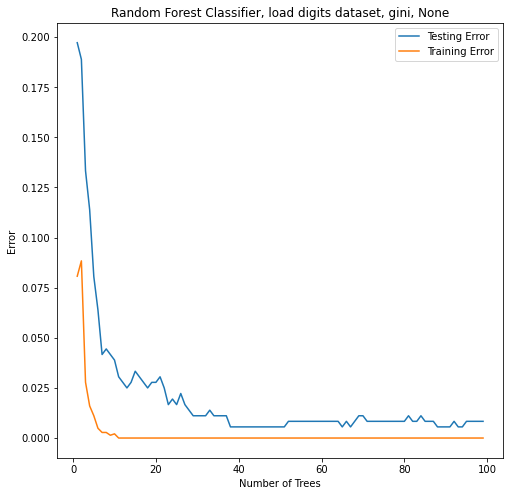

In [12]:
Trees = np.arange(1,100)
train_error = np.empty(len(Trees))
test_error = np.empty(len(Trees))


for i,k in enumerate(Trees):
    RF_clf = RandomForestClassifier(n_estimators=k, max_features="auto", max_depth=None, criterion='gini', random_state=0)# {"auto = sqrt", "log2"}
    RF_clf.fit(X_train, y_train)
    train_error[i] = 1 - RF_clf.score(X_train, y_train)
    test_error[i] = 1 - RF_clf.score(X_test, y_test)


f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)      
plt.plot(Trees, test_error, label = 'Testing Error')
plt.plot(Trees, train_error, label = 'Training Error')
plt.legend()
plt.title('Random Forest Classifier, load digits dataset, gini, None')
# plt.title('Random Forest Classifier, Olivetti faces dataset, gini, sqrt')
plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.show()

## Feature importance based on mean decrease in impurity

Elapsed time to compute the importances: 0.008 seconds


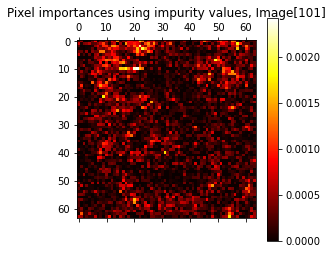

In [63]:
mask = y < 10
X = X[mask]
y = y[mask]

from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=100, max_depth=None, max_features="auto", criterion='gini', random_state=None)
RF_clf.fit(X_train,y_train)

import time
import matplotlib.pyplot as plt

start_time = time.time()
img_shape = data.images[101].shape
importances = RF_clf.feature_importances_
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
imp_reshaped = importances.reshape(img_shape)
plt.matshow(imp_reshaped, cmap=plt.cm.hot)
plt.title("Pixel importances using impurity values, Image[101]")
plt.colorbar()
plt.show()